C:\Users\mockingbird\AppData\Local\Temp\ipykernel_9944\2281461693.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=4)


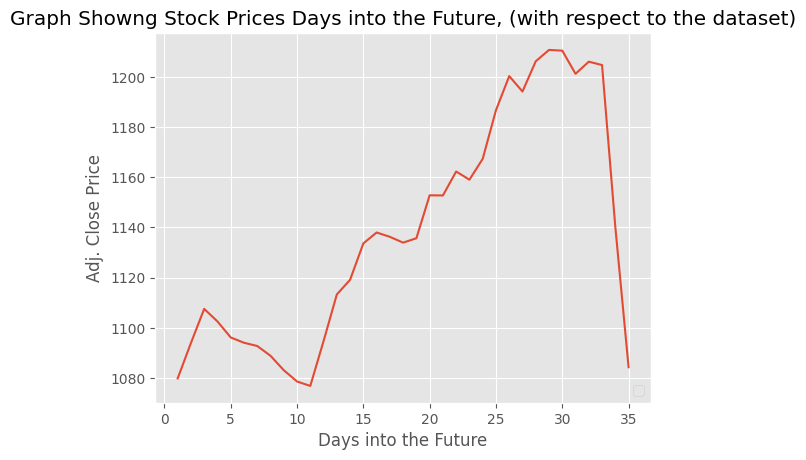

Accuracy: 97.79185212614412


In [1]:
import pandas as pd
import quandl, math
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import style, pyplot as plt


style.use("ggplot")
#fetching google historical price data
df = quandl.get("WIKI/GOOGL")

#feature engineering
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close","Adj. Volume"]]
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Low"]) / df["Adj. Low"] * 100 #the difference in percentage of high and low (range)
df["PCT_Change"] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Close"] * 100 #difference in percentage between open and close prices

#new dataframe
df = df[["Adj. Close", "HL_PCT", "PCT_Change", "Adj. Volume"]]

#declaring the column name of our label (what we're predicting)
forecast_column = "Adj. Close"

#handling missing values
df.fillna(-99999, inplace=True)

#how many days in the future do we want to predict the price?
forecast_out = int( math.ceil( 0.01*len(df) ) ) 
df['Label'] = df[forecast_column].shift(-forecast_out) #creating new column
df.dropna(inplace=True)

X = np.array( df.drop(["Label"], axis=1) )
X = preprocessing.scale(X)
y = np.array( df["Label"] )


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#create model
model = LinearRegression(n_jobs=-1)#the argument passed into the class makes training faster

#train
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

X_future_days = X[-forecast_out:] #the days we want to predict
future_days = [ i for i in range(1, (len(X_future_days)+1) )]


plt.legend(loc=4)
plt.title("Graph Showng Stock Prices Days into the Future, (with respect to the dataset)")
plt.xlabel("Days into the Future")
plt.ylabel("Adj. Close Price")
plt.plot(future_days, model.predict(X_future_days))
plt.show()
print("Accuracy:",accuracy*100)